In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
pip install poly

  Using cached Poly-0.1.1.tar.gz (26 kB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\MJ\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\MJ\\AppData\\Local\\Temp\\pip-install-4f7_lzqq\\poly\\setup.py'"'"'; __file__='"'"'C:\\Users\\MJ\\AppData\\Local\\Temp\\pip-install-4f7_lzqq\\poly\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\MJ\AppData\Local\Temp\pip-pip-egg-info-dtylf4ho'
         cwd: C:\Users\MJ\AppData\Local\Temp\pip-install-4f7_lzqq\poly\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\MJ\AppData\Local\Temp\pip-install-4f7_lzqq\poly\setup.py", line 26, in <module>
        import commands
    ModuleNotFoundError: No module named 'commands'
    ----------------------------------------
ERROR: Command errored 

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


####  Select the features 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.

In [8]:
# data is the new dataFrame
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


Text(0, 0.5, 'CO2 EMISSIONS')

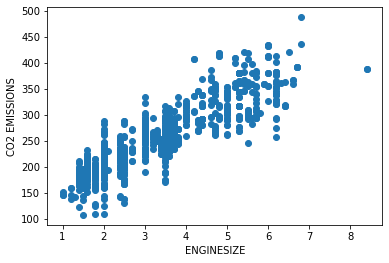

In [11]:
plt.scatter(data.ENGINESIZE,data.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2 EMISSIONS")


In [12]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [13]:
data.ENGINESIZE.value_counts()

2.0    158
3.6     92
3.5     83
3.0     75
1.6     65
2.4     61
2.5     56
5.3     48
5.0     39
1.8     37
3.7     35
6.2     32
1.4     30
4.0     22
4.4     20
4.7     17
5.7     16
3.8     16
6.0     14
5.5     14
3.4     12
1.5     12
2.7     11
4.8     10
4.3     10
4.6     10
3.2      9
5.4      8
4.2      6
5.2      6
5.6      6
3.3      5
6.4      5
1.2      4
6.7      4
1.0      3
5.9      3
6.6      3
2.1      2
6.8      2
8.4      2
6.5      1
6.3      1
1.3      1
5.8      1
Name: ENGINESIZE, dtype: int64

#### split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x= data.ENGINESIZE
x

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [16]:
y = data.CO2EMISSIONS
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 ,random_state =0)

In [18]:
X_train = pd.DataFrame(X_train)

In [19]:
X_test = pd.DataFrame(X_test)

In [20]:
X_train.shape

(746, 1)

In [21]:
y_train

571     230
310     251
435     366
483     200
172     262
       ... 
1033    186
763     256
835     269
559     306
684     262
Name: CO2EMISSIONS, Length: 746, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
model.score(X_test,y_test)

0.7245385677455163

In [25]:
model.coef_

array([39.64771341])

In [26]:
model.intercept_

125.55268333191432

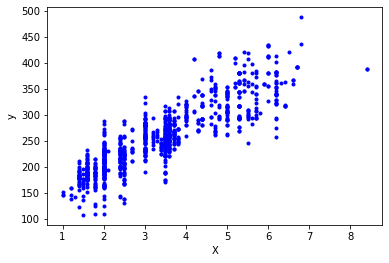

In [27]:

plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

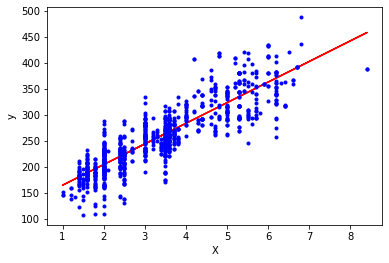

In [28]:
plt.plot(X_train,model.predict(X_train),color='r')
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [30]:
poly_3 = PolynomialFeatures(degree=3,include_bias=True)
X_train_trans = poly_3.fit_transform(X_train)
X_test_trans = poly_3.transform(X_test)


In [31]:
lr_3 = LinearRegression()
lr_3.fit(X_train_trans,y_train)

LinearRegression()

In [32]:
y_pred = lr_3.predict(X_test_trans)

In [33]:
print(lr_3.coef_)
print(lr_3.intercept_)

[ 0.         30.25850066  4.2827833  -0.4878056 ]
129.28879042428818


In [34]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_3.transform(X_new)
y_new = lr_3.predict(X_new_poly)

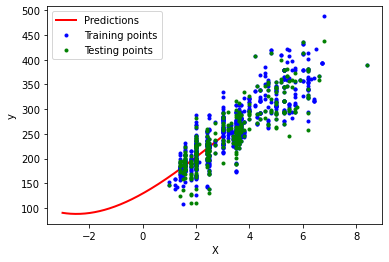

In [35]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 25.41
Residual sum of squares (MSE): 1077.52
R2-score: 0.73


In [37]:
poly4 = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans4 = poly4.fit_transform(X_train)
x_test_trans4 = poly4.transform(X_test)
lr4 = LinearRegression()
lr4.fit(x_train_trans4, y_train)
y_pred4 = lr4.predict(x_test_trans4)
print(r2_score(y_test, y_pred4))


0.7280369842987495


In [38]:
print(lr4.coef_)
print(lr4.intercept_)

[ 0.         58.43795976 -7.24887696  1.41936461 -0.10936962]
106.18590418686375


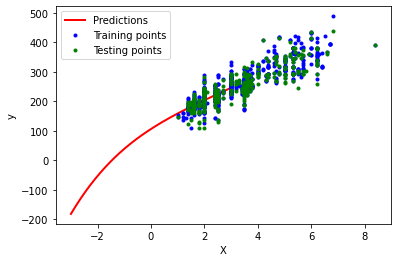

In [39]:
import matplotlib.pyplot as plt
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly4.transform(X_new)
y_new = lr4.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred4 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred4 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred4) )

Mean absolute error: 25.39
Residual sum of squares (MSE): 1078.42
R2-score: 0.73


In [41]:
poly5 = PolynomialFeatures(degree=5, include_bias=True)
x_train_trans5 = poly5.fit_transform(X_train)
x_test_trans5 = poly5.transform(X_test)
lr5 = LinearRegression()
lr5.fit(x_train_trans5, y_train)
y_pred5 = lr5.predict(x_test_trans5)
print(r2_score(y_test, y_pred5))


0.727695088937949


In [42]:
print(lr5.coef_)
print(lr5.intercept_)

[ 0.00000000e+00  2.15352819e+02 -9.66829025e+01  2.47905271e+01
 -2.93061794e+00  1.26803515e-01]
5.7661454247789266


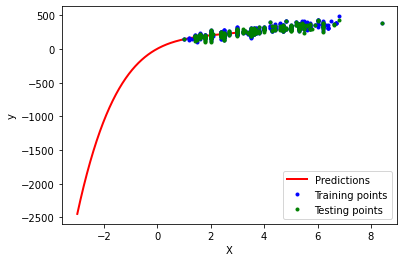

In [43]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly5.transform(X_new)
y_new = lr5.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [44]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred5 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred5 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred5) )

Mean absolute error: 25.30
Residual sum of squares (MSE): 1079.78
R2-score: 0.73


#### Polynomial regression is better than linear regression since the cost produced by the polynomial regression is less than linear regression. It gives your regression line a curvilinear shape and makes it more fitting for the underlying data. By applying a higher order polynomial, you can fit your regression line to your data more precisely but may overfit data for sufficiently higher degree. For linear regression we assume that independent and dependent variables are linearly correlated which is a drawback.